# Import Data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import numpy as np 


account = pd.read_csv("data/account.csv", sep=";")
card = pd.read_csv("data/card_dev.csv", sep=";")
client = pd.read_csv("data/client.csv", sep=";")
disposition = pd.read_csv("data/disp.csv", sep=";")
demograph = pd.read_csv("data/district.csv",sep=";")
loan = pd.read_csv("data/loan_dev.csv", sep=";")
transactions = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)
merged_data = pd.read_csv("refined/final_data.csv", sep=";")

print(merged_data.shape)

(30373, 29)


# Split Data

In [2]:
def split_data(X, y, test_size):
    return train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Sampling

In [3]:
def smote_sampling(X_train, y_train):
    sm = SMOTE(random_state=42)
    return sm.fit_resample(X_train, y_train)

# Fit and Predict

In [4]:
def fit_and_predict(model, X_train, y_train, X_test):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    return prediction

# Calculate Statistics

In [5]:
def calculate_statistics(y_test, pred):
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1_score1 = metrics.f1_score(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)
    log_loss = metrics.log_loss(y_test, pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score1}")
    print(f"AUC: {auc}")
    print(f"Log Loss: {log_loss}")
    

# Confusion Matrix

In [6]:
def display_conf_matrix_graph(y_test, pred):
    conf_matrix = confusion_matrix(y_test, pred)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["Not Paid", "Paid"])
    cm_display.plot()

# Aplication of a models

## Decision Tree

### Features : amount, duration and payments


Accuracy: 0.7070707070707071
Precision: 0.9027777777777778
Recall: 0.7471264367816092
F1-Score: 0.8176100628930817
AUC: 0.5818965517241379
Log Loss: 10.117475885196171


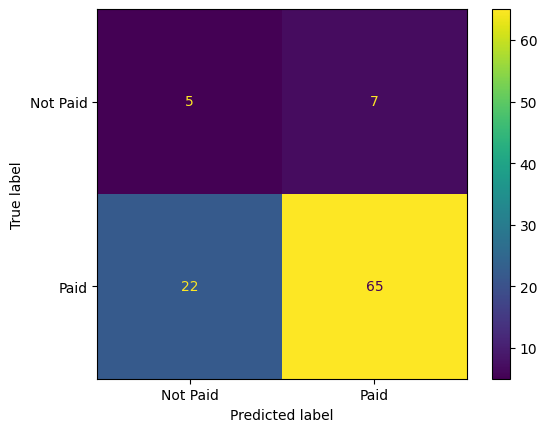

In [7]:

features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

#### Merged Data

In [8]:

# exclude non-numeric columns
merged_data = merged_data.select_dtypes(exclude=['object'])
get_collumns_names = list(merged_data)
# drop loan_status 
for index in range(len(get_collumns_names)):
    if(get_collumns_names[index] == 'loan_status'):
        del get_collumns_names[index]
        break
print(get_collumns_names)
merged_data
save_loan_status = merged_data['loan_status']

['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']
Accuracy: 0.6965539947322212
Precision: 0.9304479878511769
Recall: 0.7264643111216504
F1-Score: 0.8158998601771089
AUC: 0.5254740434664299
Log Loss: 10.480693914349327


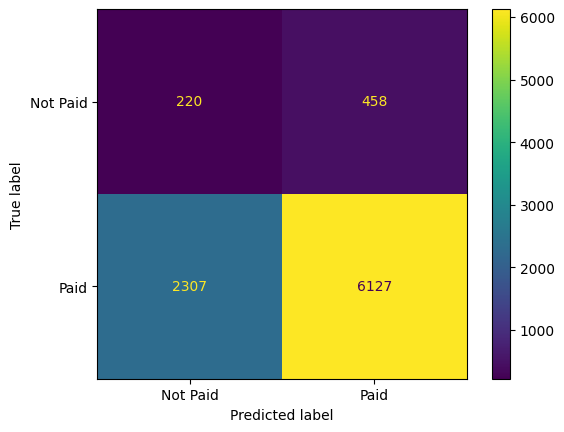

In [9]:

y = merged_data["loan_status"]
# drop loan_status from features ( obviously )
merged_data.drop(columns=["loan_status"], axis=1, inplace=True)

features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need to separate date birth day in 3 columns: day, month and year. 
We need to transform the categorical data in numerical data ( all ?!?)
Do this on data preparation and use refined data on data understanding.
The merged data, need to be sorted by date of loan ascending order. ( See this )

### Features : ft_feature_matrix_enc_md_2 from preparation phase

In [10]:

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
#ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna(axis="columns", how="any")
print(ft_feature_matrix_enc_md_2)

     account.NUM_UNIQUE(transaction.trans_operation)  loan_status  \
0                                                0.0            0   
1                                                0.6            1   
2                                                0.8            1   
3                                                0.8            1   
4                                                0.8            1   
..                                               ...          ...   
323                                              0.6            1   
324                                              0.4            0   
325                                              0.6            1   
326                                              0.4            1   
327                                              0.6            1   

     account.SKEW(transaction.trans_day)  account.MEAN(transaction.trans_day)  \
0                               0.655008                             0.608479   
1        

In [11]:

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()
#print(y)
X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)



#X.drop(columns=["loand_id"], axis=1, inplace=True)

print("X: \n\n" ,X.shape)


X: 

 (328, 31)


229    1
230    0
231    1
232    0
233    1
      ..
323    1
324    0
325    1
326    1
327    1
Name: loan_status, Length: 99, dtype: int64
0.6163793103448276
Accuracy: 0.7676767676767676
Precision: 0.9102564102564102
Recall: 0.8160919540229885
F1-Score: 0.8606060606060606
AUC: 0.6163793103448276
Log Loss: 8.02421670974704

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree

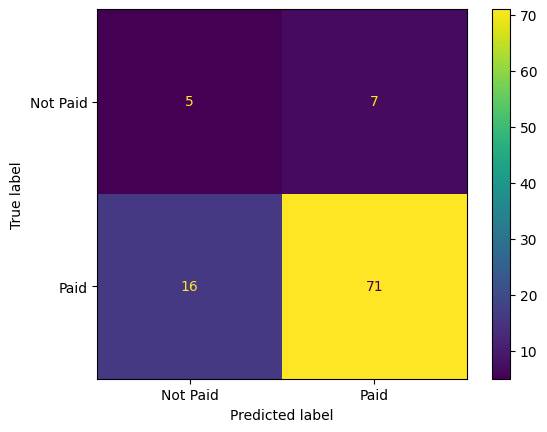

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = DecisionTreeClassifier( criterion="entropy", max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
prediction = fit_and_predict(dTree, X_train, y_train, X_test)
pred_prob1 = dTree.predict_proba(X_test)
#print(pred_prob1)
print(y_test)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
#calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)
calculate_statistics(y_test, prediction)


#XgBoost decision trees

xgBoost = xgb.XGBClassifier()

xgBoost.fit(X_train, y_train)
print()
print(xgBoost)
print("XgBoost:\n ")
expected_y  = y_test
predicted_y = xgBoost.predict(X_test)
 
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))
calculate_statistics(expected_y, predicted_y)

# Using genetic algorithm to select best pipeline classificator

In [44]:

from tpot import TPOTClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from tpot.export_utils import set_param_recursive


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.70, test_size=0.30,shuffle=False)

pipeline_optimizer = TPOTClassifier(generations=100, population_size=100, cv=5, random_state=42,
                                 verbosity=2,warm_start=True,scoring='roc_auc',n_jobs=2,periodic_checkpoint_folder="refined/tpot_checkpoints")

pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
calculate_statistics(y_test, pipeline_optimizer.predict(X_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')


#Best result from TPOT
# from sklearn.pipeline import make_pipeline

# exported_pipeline = make_pipeline(
#     SelectPercentile(score_func=f_classif, percentile=43),
#     SGDClassifier(alpha=0.001, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.0)
# )
# # Fix random state for all the steps in exported pipeline
# set_param_recursive(exported_pipeline.steps, 'random_state', 42)

# exported_pipeline.fit(X_train, y_train)
# results = exported_pipeline.predict(X_test)

# calculate_statistics(y_test, results)
# print(metrics.classification_report(expected_y, predicted_y))


                                                                                  
Generation 1 - Current best internal CV score: 0.845054945054945
Optimization Progress:   2%|▏         | 202/10100 [01:30<4:27:09,  1.62s/pipeline]

In [42]:

print(metrics.confusion_matrix(expected_y, predicted_y))

[[ 4  8]
 [17 70]]


## Logistic Regression

### Features : amount, duration and payments

Accuracy: 0.494949494949495
Precision: 0.8627450980392157
Recall: 0.5057471264367817
F1-Score: 0.6376811594202899
AUC: 0.46120689655172414
Log Loss: 17.443882999268137


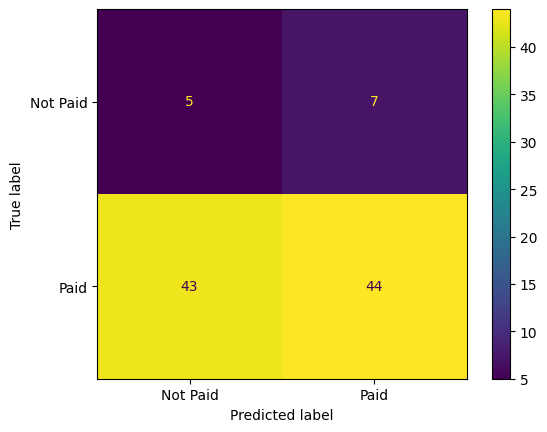

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

logistic_regression = LogisticRegression()
prediction = fit_and_predict(logistic_regression, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:

y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

Features:  ['loan_id', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_year', 'client_id', 'birth_year', 'client_age', 'client_gender', 'account_frequency', 'account_year', 'region', 'ratio of urban inhabitants ', 'average salary ', 'criminal growth', 'unemploymant growth', 'enterpreuners ratio', 'trans_amount', 'trans_balance', 'trans_year', 'trans_month', 'trans_day', 'age on loan', 'account age at loan']


ValueError: Found input variables with inconsistent numbers of samples: [9112, 99]

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_116594/3004702232.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


Accuracy: 0.8787878787878788
Precision: 0.8787878787878788
Recall: 1.0
F1-Score: 0.9354838709677419
AUC: 0.5
Log Loss: 4.186615271798895


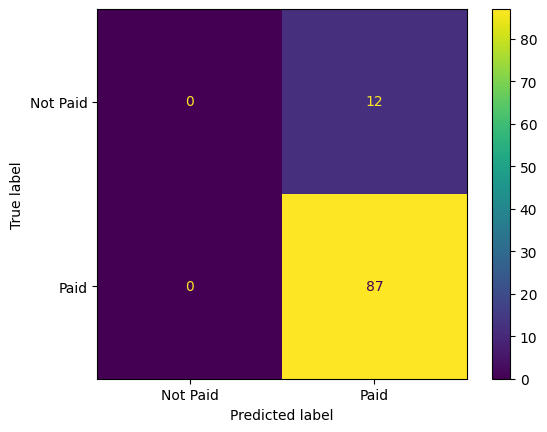

In [23]:
from sklearn.model_selection import train_test_split

ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

#X_train, y_train = smote_sampling(X_train, y_train)

dTree = LogisticRegression()
prediction = fit_and_predict(dTree, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Linear

### Features : amount, duration and payments

In [ ]:
from sklearn import svm
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for C and gamma
svm_linear = svm.SVC(kernel='linear')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

KeyboardInterrupt: 

### Features : ft_feature_matrix_enc_md_2 from preparation phase

/tmp/ipykernel_116594/2487927185.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


Accuracy: 0.7070707070707071
Precision: 0.9833333333333333
Recall: 0.6781609195402298
F1-Score: 0.802721088435374
AUC: 0.7974137931034482
Log Loss: 10.117427424745859


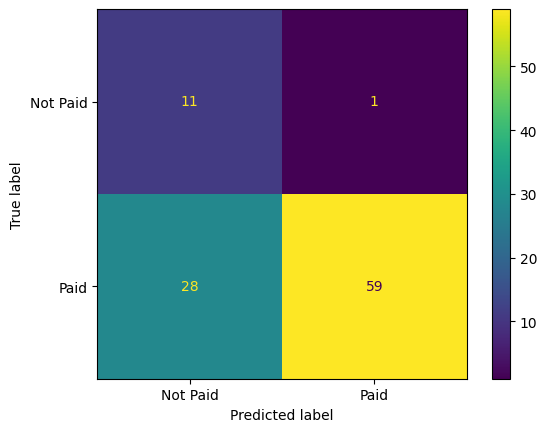

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)

svm_linear = svm.SVC(kernel='rbf')
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

A good idea is to tunne C, Gamma and Kernel parameters ( and others) depending on the data and the chosen SVM model.

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM linear parameters
svm_linear = svm.SVC(kernel="linear")
prediction = fit_and_predict(svm_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

## Support Vector Machine - Non Linear

### Features : amount, duration and payments

In [ ]:
features = ['amount', 'duration', 'payments']
X = loan[features]
y = loan["status"]
# Use numpy matrix to improve performance
X= X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

What is happening with the data? Why the model is not working?

### Features : merged data collumns names without string collumns that are not numerical

In [ ]:
y = save_loan_status
features = get_collumns_names
print("Features: ", features)
X = merged_data[features]
X= X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = split_data(X, y, 0.3)

X_train, y_train = smote_sampling(X_train, y_train)

# Default values for SVM non-linear parameters
svm_non_linear = svm.SVC(kernel="rbf")
prediction = fit_and_predict(svm_non_linear, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)

We need parameters tuning and better feature selection, data preparation and or data understanding.
Check on all models what is the positive and negative class and the confusion matrix not random ! Data sorted by date of loan ascending order. ( See this )
Experimentar várias estratégias de sampling, como por exemplo, undersampling, oversampling, SMOTE, etc.
Validatin after test, not before. ( See this ) ?!!?
Featuring enginnering, feature selection !!!! ( See this )
Descriptive modeling : clustering, PCA, etc. ( See this )
No fundo: passar por todos os passos das teóricas de data mining, e ver o que se pode fazer para melhorar os resultados. ( See this )
Tests with different models, and different parameters. ( See this )
Tests need to be about loans in the future comparing with the data training !!!!
New feature: loan amount / duration
New feature: loan amount / payments
New feature: loan amount / payments / duration
New feature: number of clients with the same account with loan
New feature: try to calculate "taxa de esforço" ou algo parecido
New feature : get month balance, calculate the average and compare with the loan month payment -> sum the value of the loan payment
Maybe delete the type of transaction !!!
-> See the formulas used by banks !!!
See account_frequency: meaning and maybe changing to numerical values

/tmp/ipykernel_93632/619107745.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")


     loan_id  account.MAX(loan.loan_status)  account.MEAN(loan.loan_status)  \
0       5314                            0.0                             0.0   
1       5316                            1.0                             1.0   
2       6863                            1.0                             1.0   
3       5325                            1.0                             1.0   
4       7240                            1.0                             1.0   
..       ...                            ...                             ...   
323     6818                            1.0                             1.0   
324     5625                            0.0                             0.0   
325     6805                            1.0                             1.0   
326     7233                            1.0                             1.0   
327     7308                            1.0                             1.0   

     account.SUM(loan.loan_status)  account.MIN(loa

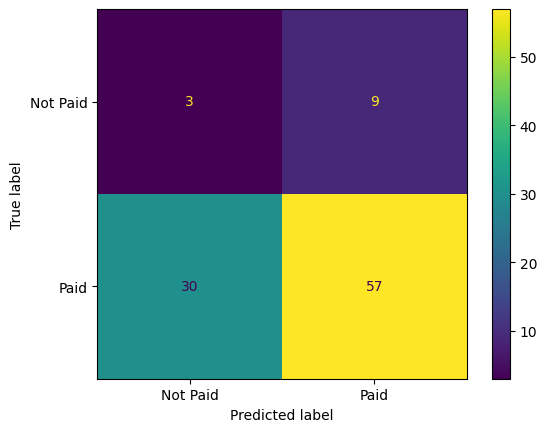

In [ ]:
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
ft_feature_matrix_enc_md_2 = pd.read_csv("refined/ft_df_mms_md_2.csv", sep=";", low_memory=False)
# drop loan_status from features ( obviously )
ft_feature_matrix_enc_md_2 = ft_feature_matrix_enc_md_2.dropna("columns", how="any")

features = ft_feature_matrix_enc_md_2.columns
features = features.dropna()

y=ft_feature_matrix_enc_md_2["loan_status"].copy()

X = ft_feature_matrix_enc_md_2.drop(columns=["loan_status"], axis=1, inplace=False)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, shuffle=False)

X_train, y_train = smote_sampling(X_train, y_train)
model= KNeighborsClassifier(n_neighbors=1)
prediction = fit_and_predict(model, X_train, y_train, X_test)

calculate_statistics(y_test, prediction)
display_conf_matrix_graph(y_test, prediction)